# Libraries

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf


# Load data

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images[0].shape)
print(train_images.shape)

(28, 28)
(60000, 28, 28)


In [54]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: ylabel='Count'>

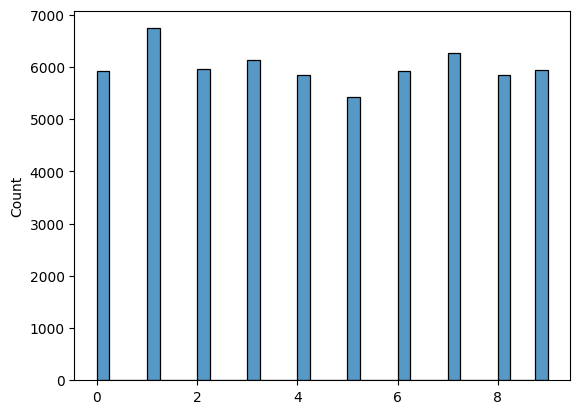

In [55]:
sns.histplot(train_labels)

In [15]:
train_images = train_images / 255
test_images = test_images / 255

# Reshape to create extra dim (1) to be size of color depth of the pixel (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [45]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(
#         input_shape=(28,28,1), activation='relu',
#         kernel_size=3, filters=8
#     ),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        input_shape=(28,28,1), activation='relu',
        kernel_size=3, filters=16
    ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_8 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               346240    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [46]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [47]:
history = model.fit( train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1844 - accuracy: 0.9452
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0678 - accuracy: 0.9790
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 4/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0366 - accuracy: 0.9880
Epoch 5/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0283 - accuracy: 0.9907
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 7/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 8/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0173 - accuracy: 0.9941
Epoch 9/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0135 - accuracy: 0.9953
Epoch 10/15
1875/1875 [==============================] - 14s 8ms/step - l

In [ ]:
history

# Test

In [48]:
test_images.shape

(10000, 28, 28, 1)

In [52]:
score = model.evaluate( test_images, test_labels )
print(f"Test accuracy: {score[1]:.3f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9876
Test accuracy: 0.988


(28, 28, 1)
1/1 [==============================] - 0s 23ms/step
1_1.png
Label: 1 | prediction: [4]


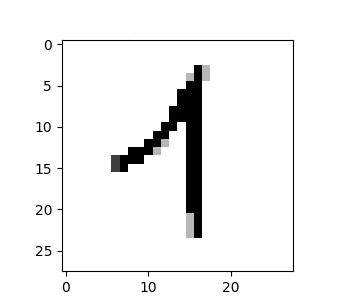

(28, 28, 1)
1/1 [==============================] - 0s 21ms/step
1_2.png
Label: 1 | prediction: [1]


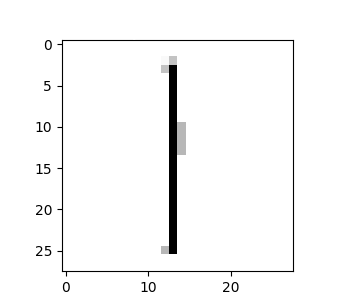

(28, 28, 1)
1/1 [==============================] - 0s 23ms/step
Digit_one.png
Label: 1 | prediction: [7]


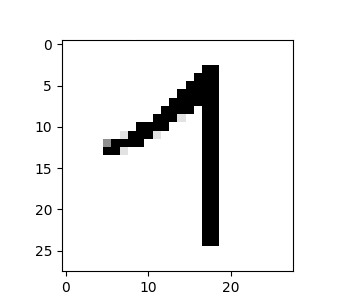

(28, 28, 1)
1/1 [==============================] - 0s 19ms/step
2_1.png
Label: 2 | prediction: [2]


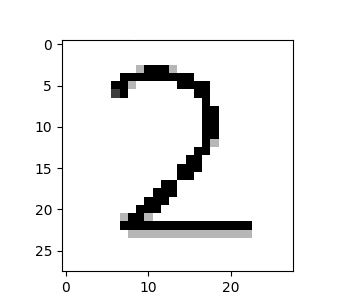

(28, 28, 1)
1/1 [==============================] - 0s 25ms/step
Digit_two.png
Label: 2 | prediction: [2]


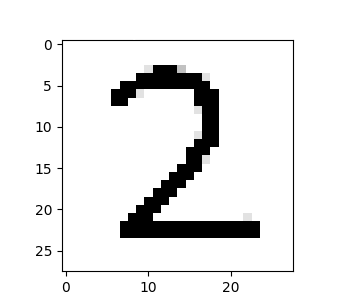

(28, 28, 1)
1/1 [==============================] - 0s 17ms/step
3_1.png
Label: 3 | prediction: [3]


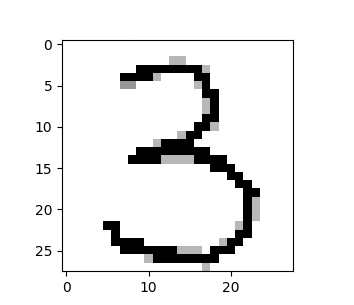

(28, 28, 1)
1/1 [==============================] - 0s 24ms/step
Digit_four.png
Label: 4 | prediction: [4]


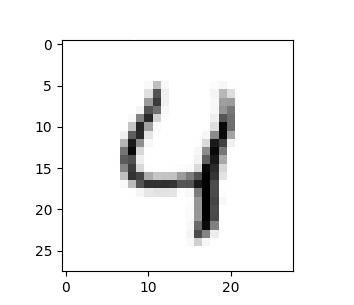

(28, 28, 1)
1/1 [==============================] - 0s 19ms/step
Digit_five (2).png
Label: 5 | prediction: [5]


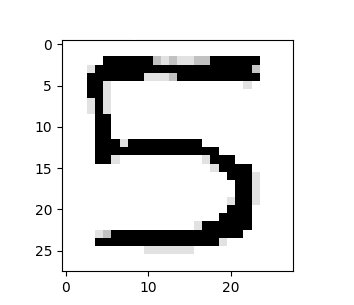

(28, 28, 1)
1/1 [==============================] - 0s 22ms/step
Digit_five.png
Label: 5 | prediction: [3]


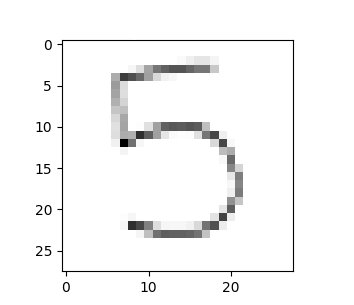

In [53]:
# # We can also load some custom images to test

def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	# data = list(img.getdata())
	# print(type(data))
	img = np.array(img)
	data = img.reshape(28,28,1)
	print(data.shape)
	data = img
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		predictions_vector = model.predict(image_data)
		predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1